In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
(df['species']).value_counts()
#frequency of species

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
df=df.dropna()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
x=(df['sepal_length'])
y=df['species']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.shape

(120,)

In [14]:
y_train.shape

(120,)

In [15]:
x_test.shape

(30,)

In [16]:
y_test.shape

(30,)

In [17]:
x_train=x_train.values.reshape(120,1)
x_train.shape

(120, 1)

In [18]:
y_train=y_train.values.reshape(120,1)
y_train.shape

(120, 1)

In [19]:
x_test=x_test.values.reshape(30,1)
x_test.shape

(30, 1)

In [20]:
y_test=y_test.values.reshape(30,1)
y_test.shape

(30, 1)

# knn

In [21]:
KNeighborsClassifier(
n_neighbors=50,
weights='uniform',
algorithm='auto',
leaf_size=30,
p=2,
metric='minkowski',
metric_params=None,
n_jobs=None
)

KNeighborsClassifier(n_neighbors=50)

In [22]:
clf=KNeighborsClassifier(p=1)
clf.fit(x_train,y_train)

D:\data_science_work\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(p=1)

In [23]:
pred=clf.predict(x_test)
print(pred)

['versicolor' 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'virginica' 'setosa' 'setosa']


D:\data_science_work\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
pred=clf.predict([[5.1],[5.9],[6.7]])
pred

D:\data_science_work\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['setosa', 'versicolor', 'virginica'], dtype=object)

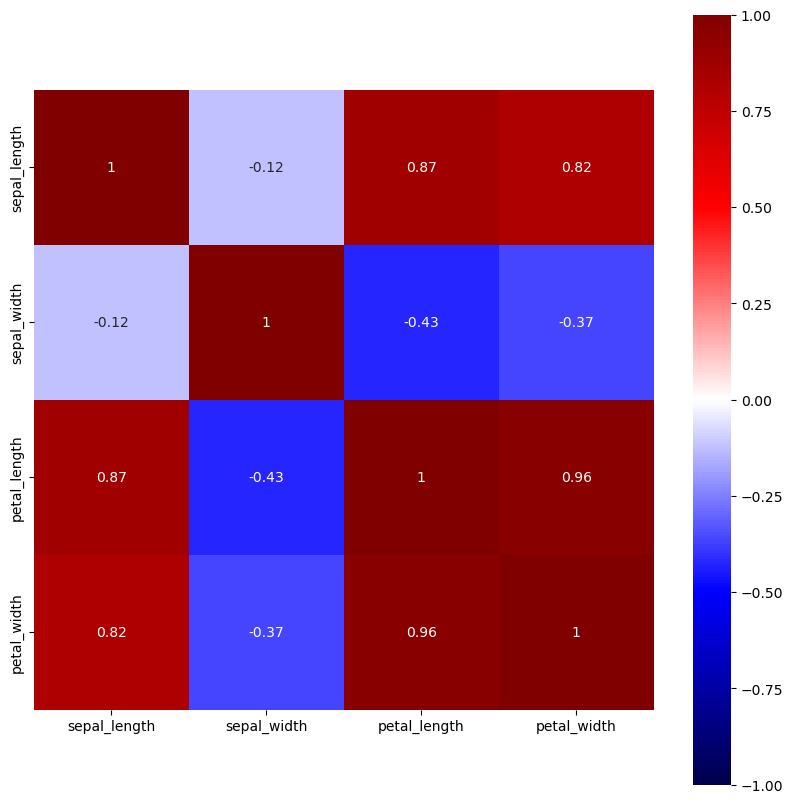

In [25]:
corr_flowers=df.corr()
ax=plt.subplots(figsize=(10,10))
flowers_corr=sns.heatmap(corr_flowers,vmin=-1,vmax=1,center=0,square=True,annot=True,cmap=sns.color_palette("seismic", as_cmap=True))
plt.show()

# decision tree

In [26]:
# building the decision tree model
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [27]:
# evaluating the model/calculating the accuracy of the model
print(accuracy_score(y_test,y_pred)*100)

66.66666666666666


In [28]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       0.91      0.91      0.91        11
  versicolor       0.62      0.62      0.62        13
   virginica       0.33      0.33      0.33         6

    accuracy                           0.67        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.67      0.67      0.67        30



In [29]:
# making predictions on a random sample
sample=np.array([[6.7]])
clf.predict(sample)

array(['virginica'], dtype=object)

In [30]:
# making decision tree
features=['sepal_length','sepal_width','petal_length','petal_width']
species=['setosa','versicolor','virginica']


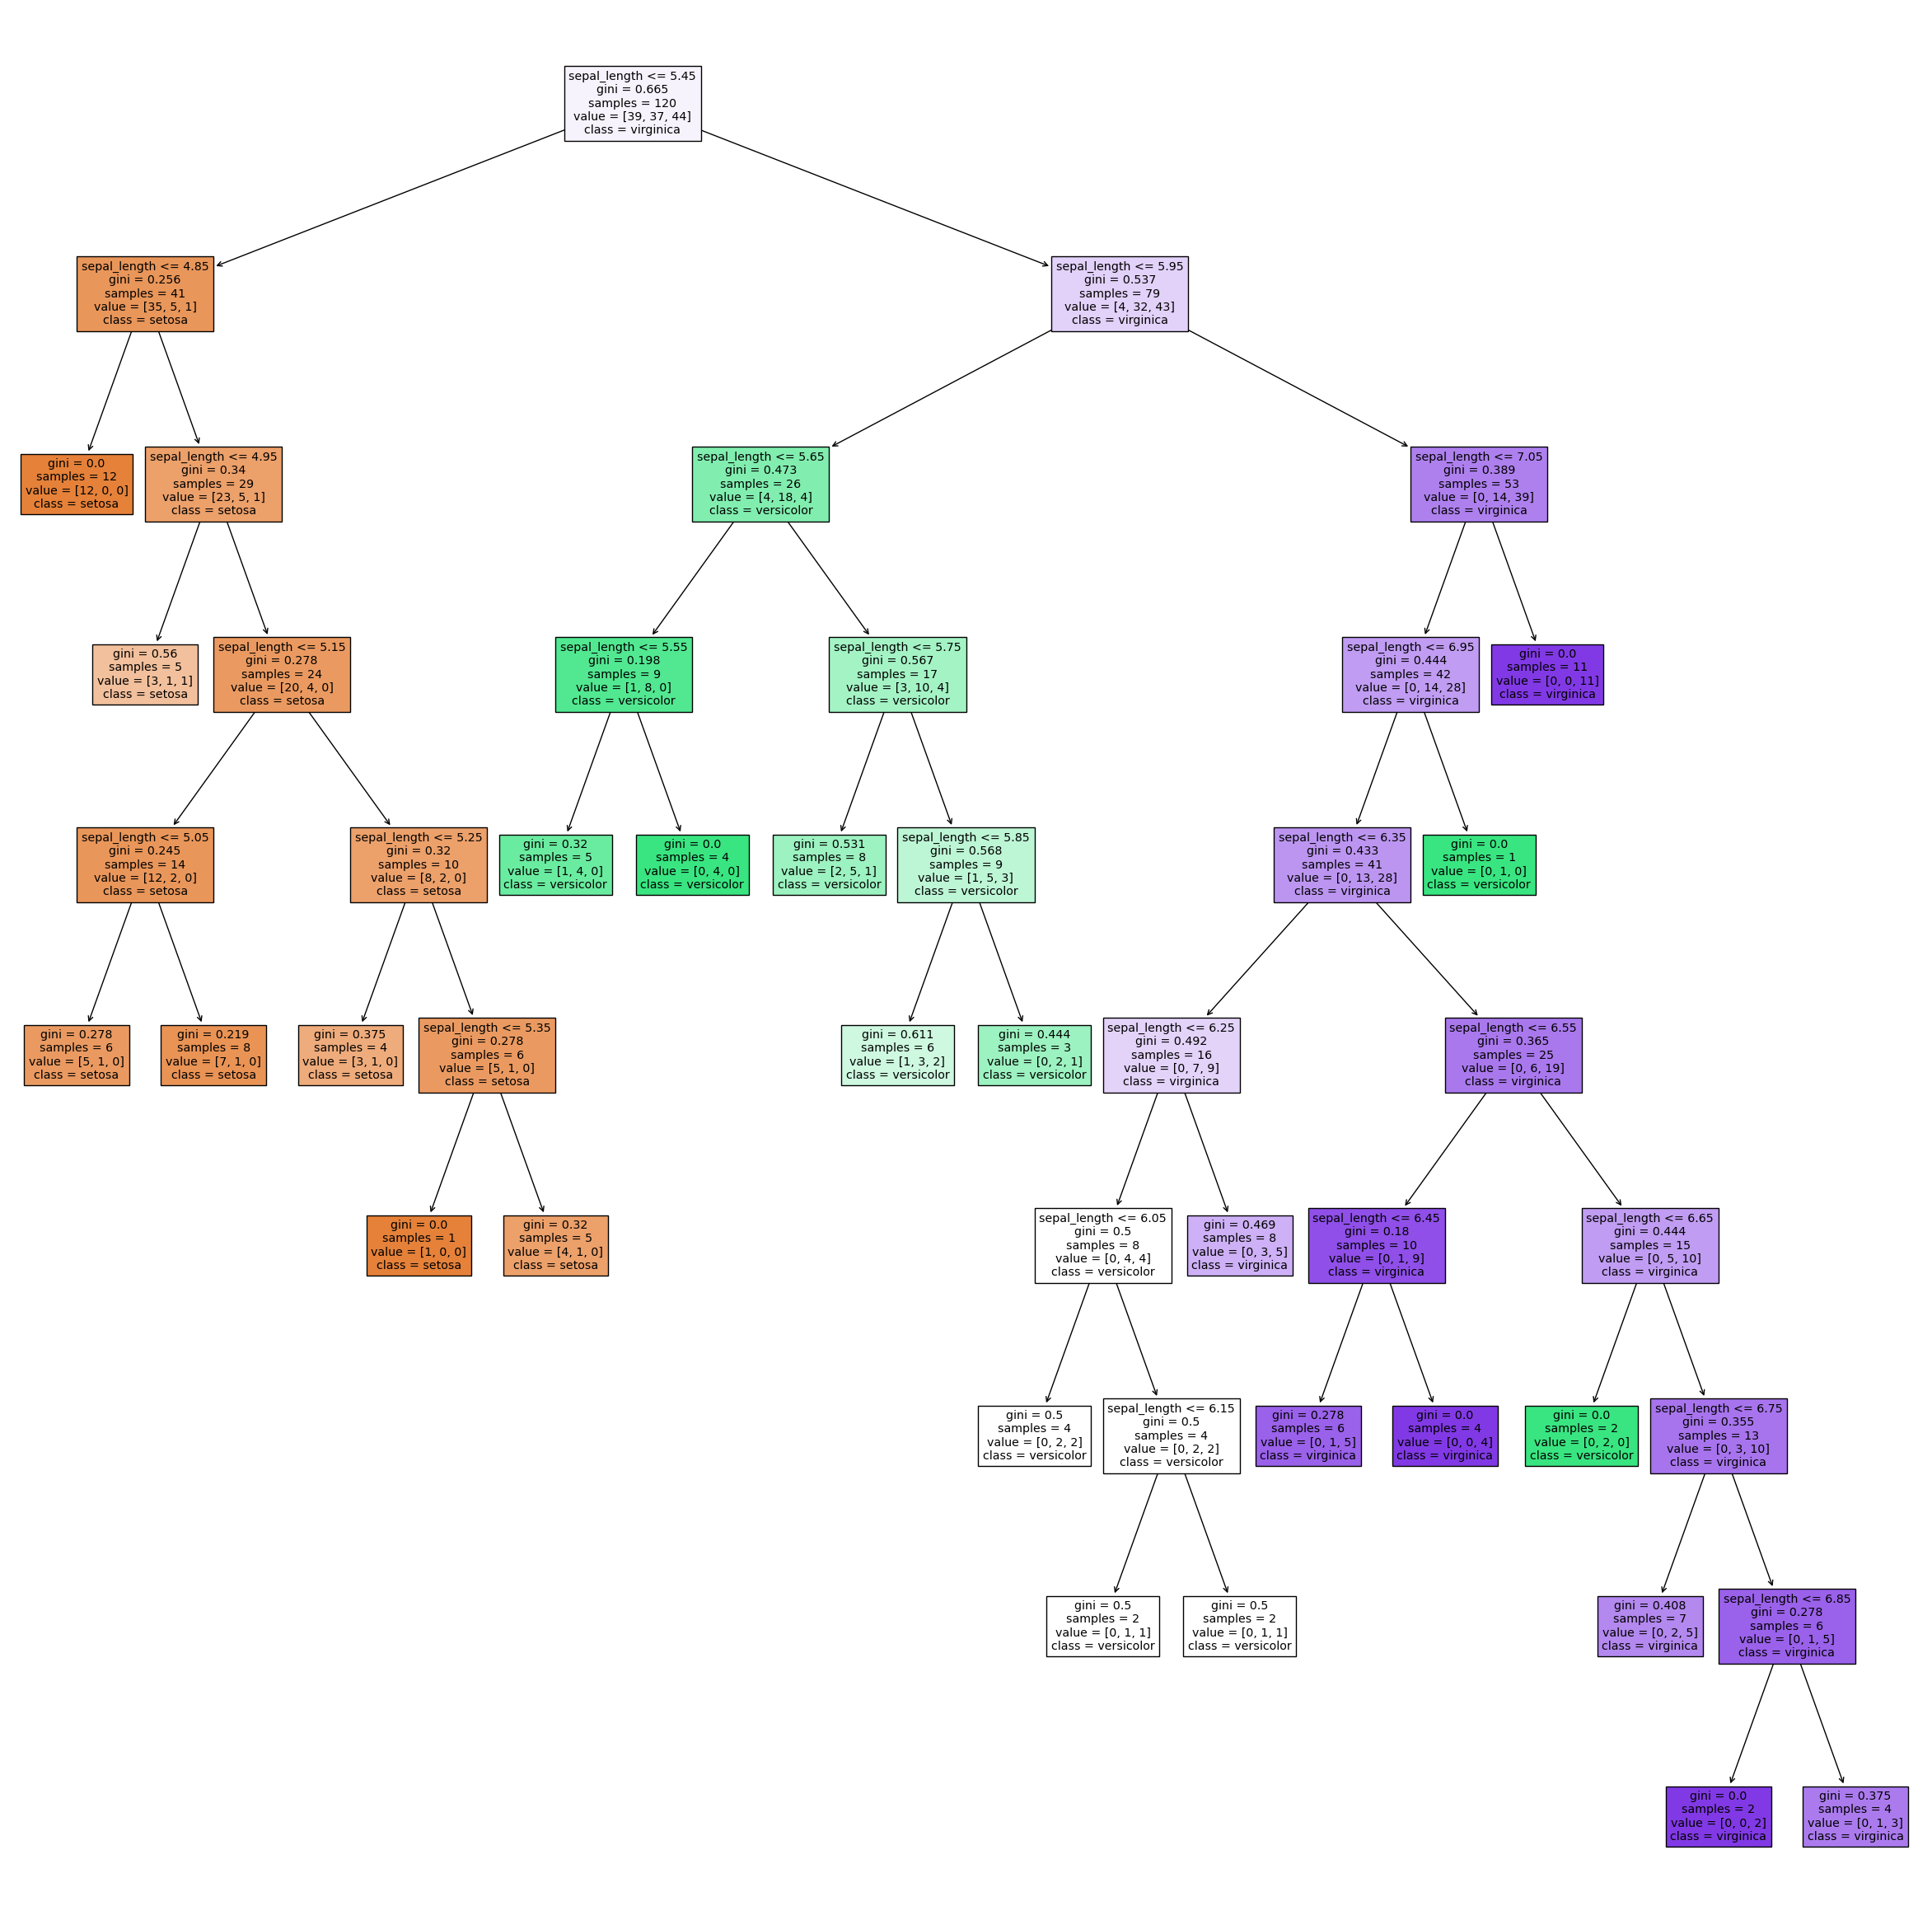

In [31]:
fig=plt.figure(figsize=(30,30))
tree.plot_tree(clf,feature_names=features,class_names=species,filled=True);